# Programming Assignment 3
* CSCI-4930/5930 ML Spring 2019
* Author: Shreya Dubey 

# Task 1 : Logistic Regression based Classifier  (LR)

I have created 3 seperate Jupyter Notebook files one for each classifier. The task 4 content is in this file at the end

### Import all the necessary packages here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import metrics
sns.set()
from sklearn.model_selection import train_test_split
import warnings
import math
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
#Reading the csv file 
X = pd.read_csv("Set-A.X.csv")
Y = pd.read_csv("Set-A.y.csv")

In [3]:
#Reading the B data set csv file
X_B = pd.read_csv("Set-B.X.csv")
Y_B = pd.read_csv("Set-B.y.csv")

In [4]:
# Handling the missing values in A data set
m = X['domain1']
most_frequent = pd.get_dummies(m).sum().sort_values(ascending=False).index[0] 
def replace_most_frequent(x):
    if pd.isnull(x):
        return most_frequent
    else:
        return x
new_m = m.map(replace_most_frequent)
X['domain1'] = new_m
#print("new Value = ",X.iloc[70382]['domain1'])

# Handling the moissing values in B data set
m = X_B['state1']
most_frequent = pd.get_dummies(m).sum().sort_values(ascending=False).index[0] 
def replace_most_frequent(x):
    if pd.isnull(x):
        return most_frequent
    else:
        return x
new_m = m.map(replace_most_frequent)
X_B['state1'] = new_m
#print("new Value = ",X_B.iloc[70382]['domain1'])

In [5]:
# Changing categorical value into numerical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_train_dum = X['state1']
df_train_dum_encoded = encoder.fit_transform(df_train_dum)

df_train_dum1 = X['domain1']
df_train_dum1_encoded = encoder.fit_transform(df_train_dum1)

X['state1'] = df_train_dum_encoded
X['domain1'] = df_train_dum1_encoded

df_train_B_dum = X_B['state1']
df_train_B_dum_encoded = encoder.fit_transform(df_train_B_dum)

df_train_B_dum1 = X_B['custAttr2']
df_train_B_dum1_encoded = encoder.fit_transform(df_train_B_dum1)

X_B['state1'] = df_train_B_dum_encoded
X_B['custAttr2'] = df_train_B_dum1_encoded

In [6]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94681 entries, 0 to 94680
Data columns (total 1 columns):
0    94681 non-null int64
dtypes: int64(1)
memory usage: 739.8 KB


In [7]:
#changing to numpy
X = X.values
X_new = X[0:94681,:]

X_B = X_B.values
X_B_new = X_B[0:99999,:]

In [8]:
#joining the X and Y into one data set
X_new = np.append(X_new,Y,axis=1)

X_B_new = np.append(X_B_new,Y_B,axis=1)

Task 1.5 I am creating a less skewed data that has a better percentage of positive data in it when compared to the full dataset.

In [9]:
# Creating a less skewed data set for A data set
m = 0
n = 0
X_train_A_whole = np.empty((20940,20))
X_not_A_fraud = np.empty((92587,20))
for a in X_new:
    if(a[-1]==1):
        X_train_A_whole[m,:] = a
        m = m+1
    else:
        X_not_A_fraud[n,:] = a
        n = n+1

for j in range (18846):
    X_train_A_whole[m+j,:] = X_not_A_fraud[j,:]
    
# Creating a less skewed data set for B data set
m1 = 0
n1 = 0
X_train_B_whole = np.empty((26540,20))
X_not_B_fraud = np.empty((97345,20))
for a in X_B_new:
    if(a[-1]==1):
        X_train_B_whole[m1,:] = a
        m1 = m1+1
    else:
        X_not_B_fraud[n1,:] = a
        n1 = n1+1

for j in range (23886):
    X_train_B_whole[m1+j,:] = X_not_B_fraud[j,:]

In [10]:
#Splitting the data in training and test data
#train_set, test_set = train_test_split(X_new, test_size=0.20)
train_set, test_set = train_test_split(X_train_A_whole, test_size=0.20 )
X_train = train_set[:,0:18]
Y_train = train_set[:,19]

X_test = test_set[:,0:18]
Y_test = test_set[:,19]

Y_train.shape = (len(Y_train),1)

#train_set_B, test_set_B = train_test_split(X_B_new, test_size=0.20)
train_set_B, test_set_B = train_test_split(X_train_B_whole, test_size=0.20 )
X_train_B = train_set_B[:,0:18]
Y_train_B = train_set_B[:,19]

X_test_B = test_set_B[:,0:18]
Y_test_B = test_set_B[:,19]

Y_train_B.shape = (len(Y_train_B),1)

In [11]:
# Normalising the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_B = scaler.fit_transform(X_train_B)
X_test_B = scaler.transform(X_test_B)

I have set the below hyperparameters by doing cross validation on different values and this was the most optimum value.

In [12]:
# Setting the value of alpha and iterations
alpha = 0.1
iters = 5

In [13]:
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        #print("X_mini = ", X_mini.shape)
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

In [14]:
# Function to computeLost
def computeLoss(X,y,weight):
    
    h = X@weight.T    # '@' for matrix multiplication. Alternatively matmult() can be used
    num = len(h)
    sig_h = np.empty((num,1))
    for i in range(num):
        sig_h[i,:] = 1 / (1 + math.exp(-h[i,:]))
    
    error = sig_h-y    
    loss = np.power(error,2)
    J = np.sum(loss)/(2*len(X))
    return J

In [15]:
# Function for gradient descent
def gradientDescent(X,y,weight,iters,alpha,batch_size = 128):
    loss = np.zeros(iters)
    #lamda = 2
    for i in range(iters):
        mini_batches = create_mini_batches(X,y,batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            y_hat,y_hat_score =getPrediction(X_mini,weight) 
            #gradient = np.sum((X_mini*(y_hat - y_mini))-(lamda*weight) ,  axis = 0)
            gradient = np.sum((X_mini*(y_hat - y_mini)) ,  axis = 0)
            weight = weight - (alpha/len(X))*gradient 
            loss[i] = computeLoss(X, y, weight) 
        
        # print cost after every 100 iterations to keep a track of when the cost function converges
        if i%1 == 0:
            print("Iteration %d | loss: %f" % (i, loss[i]))            
    return weight,loss

In [16]:
# Function to get predicted value
def getPrediction(x_test,W):
    h = x_test@W.T    # '@' for matrix multiplication. Alternatively matmult() can be used
    num = len(h)
    sig_h = np.empty((num,1))
    sig_h_score = np.empty((num,1))
    for i in range(num):
        sig_h_score[i,:] = 1 / (1 + math.exp(-h[i,:]))
        if(sig_h_score[i,0]>0.5):
            sig_h[i,0] = 1
        else:
            sig_h[i,0] = 0
    return sig_h,sig_h_score

In [17]:
# function to calculate cost for comparison
def getCost(tp,tn,fp,fn):
    Cost2 = (tp*(-1))+(tn*(0))+(fp*100)+(fn*(1))
    Cost1 = (tp*(-1))+(tn*(0))+(fp*1)+(fn*(100))
    return Cost1,Cost2

In [18]:
# Function to get results
def getResult(Y_test,learned_Y,y_score):
    confusion_matrix = metrics.confusion_matrix(Y_test,learned_Y)
    tn, fp, fn, tp = metrics.confusion_matrix(Y_test,learned_Y).ravel()
    accuracy = metrics.accuracy_score(Y_test,learned_Y)
    precision = metrics.precision_score(Y_test,learned_Y) 
    recall = metrics.recall_score(Y_test,learned_Y)
    fscore = metrics.f1_score(Y_test,learned_Y)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test,y_score) 
    auc = metrics.roc_auc_score(Y_test,y_score)
    
    print("Logistic Regression Classifier")
    print("confusion matrix = ",confusion_matrix)
    print("tp = ",tp,"fp = ",fp,"fn = ",fn,"tn = ",tn)
    print("accuracy score  = ",accuracy)
    print("precision = ",precision)
    print("recall = ",recall)
    print("F1-score = ",fscore)
    print("auc = ",auc)
    cost1,cost2 = getCost(tp,tn,fp,fn)
    print("Cost for less false negative = ",cost1)
    print("Cost for less false positive = ",cost2)
    
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr,linestyle = 'dashed', color = 'olive')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

Task 1.1 Performing 10 fold cross validation

Iteration 0 | loss: 0.124924
Iteration 1 | loss: 0.124761
Iteration 2 | loss: 0.124881
Iteration 3 | loss: 0.124978
Iteration 4 | loss: 0.124827
Logistic Regression Classifier
confusion matrix =  [[1522    0]
 [ 154    0]]
tp =  0 fp =  0 fn =  154 tn =  1522
accuracy score  =  0.9081145584725537
precision =  0.0
recall =  0.0
F1-score =  0.0
auc =  0.7346259194156698
Cost for less false negative =  15400
Cost for less false positive =  154


C:\Users\khare\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\khare\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


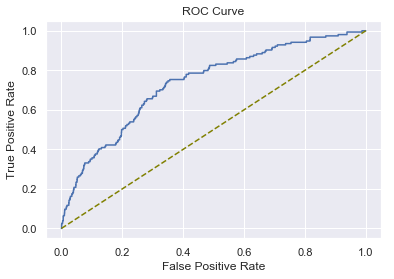

Iteration 0 | loss: 0.124903
Iteration 1 | loss: 0.124858
Iteration 2 | loss: 0.124791
Iteration 3 | loss: 0.124925
Iteration 4 | loss: 0.124946
Logistic Regression Classifier
confusion matrix =  [[1496    5]
 [ 168    7]]
tp =  7 fp =  5 fn =  168 tn =  1496
accuracy score  =  0.8967780429594272
precision =  0.5833333333333334
recall =  0.04
F1-score =  0.0748663101604278
auc =  0.7257771009802989
Cost for less false negative =  16798
Cost for less false positive =  661


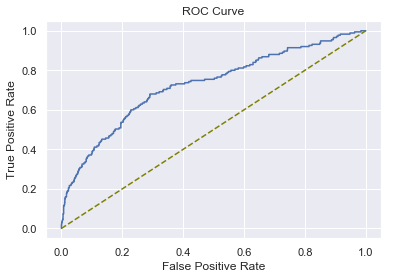

Iteration 0 | loss: 0.124853
Iteration 1 | loss: 0.124938
Iteration 2 | loss: 0.124950
Iteration 3 | loss: 0.124716
Iteration 4 | loss: 0.124780
Logistic Regression Classifier
confusion matrix =  [[1522    0]
 [ 153    0]]
tp =  0 fp =  0 fn =  153 tn =  1522
accuracy score  =  0.9086567164179105
precision =  0.0
recall =  0.0
F1-score =  0.0
auc =  0.6948631401750364
Cost for less false negative =  15300
Cost for less false positive =  153


C:\Users\khare\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\khare\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


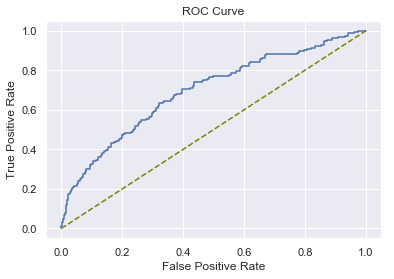

Iteration 0 | loss: 0.124926
Iteration 1 | loss: 0.124974
Iteration 2 | loss: 0.124935
Iteration 3 | loss: 0.124850
Iteration 4 | loss: 0.124864
Logistic Regression Classifier
confusion matrix =  [[1506    0]
 [ 169    0]]
tp =  0 fp =  0 fn =  169 tn =  1506
accuracy score  =  0.8991044776119403
precision =  0.0
recall =  0.0
F1-score =  0.0
auc =  0.7308085213387083
Cost for less false negative =  16900
Cost for less false positive =  169


C:\Users\khare\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\khare\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


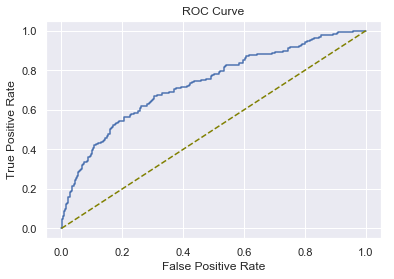

Iteration 0 | loss: 0.124865
Iteration 1 | loss: 0.124937
Iteration 2 | loss: 0.124976
Iteration 3 | loss: 0.124981
Iteration 4 | loss: 0.124845
Logistic Regression Classifier
confusion matrix =  [[1520    0]
 [ 155    0]]
tp =  0 fp =  0 fn =  155 tn =  1520
accuracy score  =  0.9074626865671642
precision =  0.0
recall =  0.0
F1-score =  0.0
auc =  0.7450848896434636
Cost for less false negative =  15500
Cost for less false positive =  155


C:\Users\khare\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\khare\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


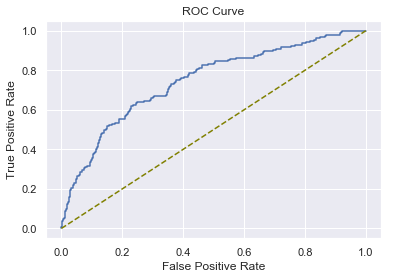

Iteration 0 | loss: 0.124958
Iteration 1 | loss: 0.124970
Iteration 2 | loss: 0.124957
Iteration 3 | loss: 0.125001
Iteration 4 | loss: 0.124970
Logistic Regression Classifier
confusion matrix =  [[1444   51]
 [ 133   47]]
tp =  47 fp =  51 fn =  133 tn =  1444
accuracy score  =  0.8901492537313432
precision =  0.47959183673469385
recall =  0.2611111111111111
F1-score =  0.33812949640287776
auc =  0.7637866963953919
Cost for less false negative =  13304
Cost for less false positive =  5186


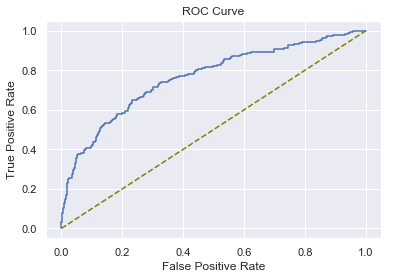

Iteration 0 | loss: 0.124647
Iteration 1 | loss: 0.124952
Iteration 2 | loss: 0.124928
Iteration 3 | loss: 0.124958
Iteration 4 | loss: 0.124979
Logistic Regression Classifier
confusion matrix =  [[1272  228]
 [  87   88]]
tp =  88 fp =  228 fn =  87 tn =  1272
accuracy score  =  0.8119402985074626
precision =  0.27848101265822783
recall =  0.5028571428571429
F1-score =  0.3584521384928717
auc =  0.7558285714285714
Cost for less false negative =  8840
Cost for less false positive =  22799


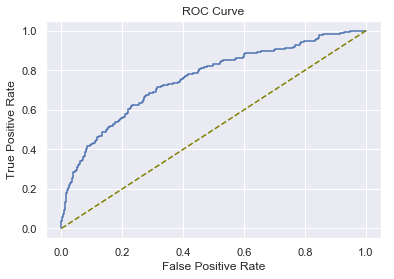

Iteration 0 | loss: 0.124813
Iteration 1 | loss: 0.124915
Iteration 2 | loss: 0.124910
Iteration 3 | loss: 0.124884
Iteration 4 | loss: 0.124908
Logistic Regression Classifier
confusion matrix =  [[1504    0]
 [ 171    0]]
tp =  0 fp =  0 fn =  171 tn =  1504
accuracy score  =  0.897910447761194
precision =  0.0
recall =  0.0
F1-score =  0.0
auc =  0.7466055431131018
Cost for less false negative =  17100
Cost for less false positive =  171


C:\Users\khare\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\khare\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


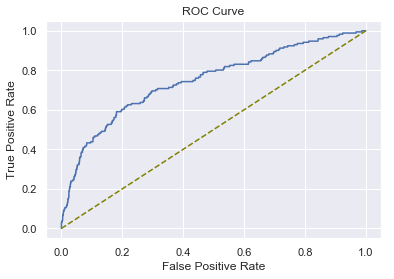

Iteration 0 | loss: 0.124769
Iteration 1 | loss: 0.124944
Iteration 2 | loss: 0.124828
Iteration 3 | loss: 0.124856
Iteration 4 | loss: 0.124970
Logistic Regression Classifier
confusion matrix =  [[1432   64]
 [ 122   57]]
tp =  57 fp =  64 fn =  122 tn =  1432
accuracy score  =  0.888955223880597
precision =  0.47107438016528924
recall =  0.31843575418994413
F1-score =  0.38
auc =  0.7782037014907537
Cost for less false negative =  12207
Cost for less false positive =  6465


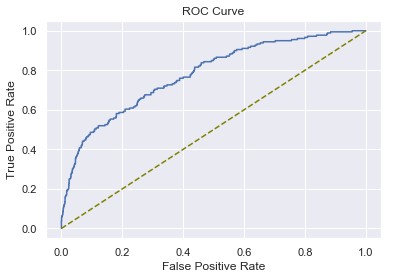

Iteration 0 | loss: 0.124920
Iteration 1 | loss: 0.124790
Iteration 2 | loss: 0.124899
Iteration 3 | loss: 0.124961
Iteration 4 | loss: 0.124978
Logistic Regression Classifier
confusion matrix =  [[1357  150]
 [  96   72]]
tp =  72 fp =  150 fn =  96 tn =  1357
accuracy score  =  0.8531343283582089
precision =  0.32432432432432434
recall =  0.42857142857142855
F1-score =  0.3692307692307692
auc =  0.7549313521028849
Cost for less false negative =  9678
Cost for less false positive =  15024


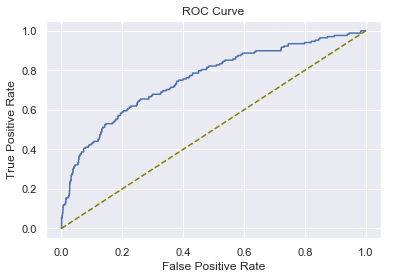

Iteration 0 | loss: 0.124980
Iteration 1 | loss: 0.124919
Iteration 2 | loss: 0.124935
Iteration 3 | loss: 0.124950
Iteration 4 | loss: 0.124971
Logistic Regression Classifier
confusion matrix =  [[1842   52]
 [  82  148]]
tp =  148 fp =  52 fn =  82 tn =  1842
accuracy score  =  0.9369114877589454
precision =  0.74
recall =  0.6434782608695652
F1-score =  0.6883720930232557
auc =  0.8451643634360222
Cost for less false negative =  8104
Cost for less false positive =  5134


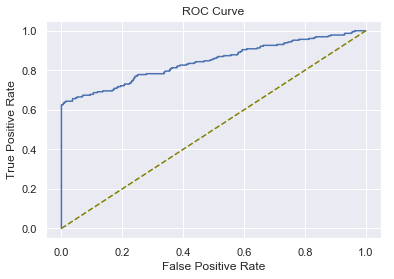

Iteration 0 | loss: 0.124981
Iteration 1 | loss: 0.124974
Iteration 2 | loss: 0.124938
Iteration 3 | loss: 0.124970
Iteration 4 | loss: 0.124972
Logistic Regression Classifier
confusion matrix =  [[1852   54]
 [  73  145]]
tp =  145 fp =  54 fn =  73 tn =  1852
accuracy score  =  0.9402071563088512
precision =  0.7286432160804021
recall =  0.6651376146788991
F1-score =  0.6954436450839329
auc =  0.8565033645561578
Cost for less false negative =  7209
Cost for less false positive =  5328


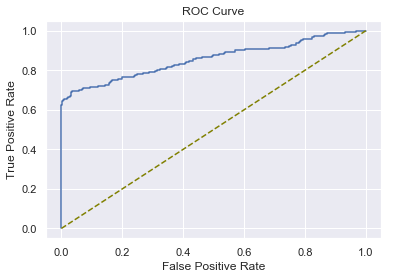

Iteration 0 | loss: 0.124959
Iteration 1 | loss: 0.124973
Iteration 2 | loss: 0.124958
Iteration 3 | loss: 0.124936
Iteration 4 | loss: 0.124961
Logistic Regression Classifier
confusion matrix =  [[1894    5]
 [  78  146]]
tp =  146 fp =  5 fn =  78 tn =  1894
accuracy score  =  0.9609043805934998
precision =  0.9668874172185431
recall =  0.6517857142857143
F1-score =  0.7786666666666666
auc =  0.8545639622357633
Cost for less false negative =  7659
Cost for less false positive =  432


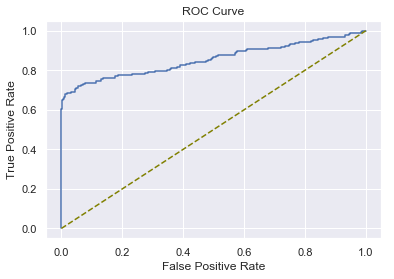

Iteration 0 | loss: 0.124960
Iteration 1 | loss: 0.124978
Iteration 2 | loss: 0.124960
Iteration 3 | loss: 0.124971
Iteration 4 | loss: 0.124973
Logistic Regression Classifier
confusion matrix =  [[1760  174]
 [  44  145]]
tp =  145 fp =  174 fn =  44 tn =  1760
accuracy score  =  0.8973151201130476
precision =  0.45454545454545453
recall =  0.7671957671957672
F1-score =  0.5708661417322834
auc =  0.8738721732516975
Cost for less false negative =  4429
Cost for less false positive =  17299


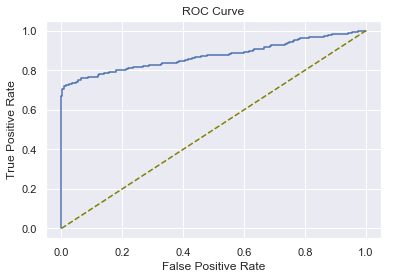

Iteration 0 | loss: 0.124977
Iteration 1 | loss: 0.124983
Iteration 2 | loss: 0.124964
Iteration 3 | loss: 0.124972
Iteration 4 | loss: 0.124972
Logistic Regression Classifier
confusion matrix =  [[1823  103]
 [  57  140]]
tp =  140 fp =  103 fn =  57 tn =  1823
accuracy score  =  0.9246349505416863
precision =  0.5761316872427984
recall =  0.7106598984771574
F1-score =  0.6363636363636365
auc =  0.8520894940198512
Cost for less false negative =  5663
Cost for less false positive =  10217


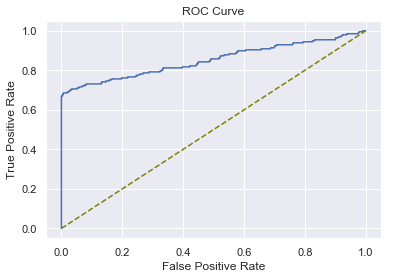

Iteration 0 | loss: 0.124982
Iteration 1 | loss: 0.124976
Iteration 2 | loss: 0.124929
Iteration 3 | loss: 0.124940
Iteration 4 | loss: 0.124953
Logistic Regression Classifier
confusion matrix =  [[1903    0]
 [ 108  112]]
tp =  112 fp =  0 fn =  108 tn =  1903
accuracy score  =  0.9491285916156382
precision =  1.0
recall =  0.509090909090909
F1-score =  0.6746987951807228
auc =  0.8509196006305835
Cost for less false negative =  10688
Cost for less false positive =  -4


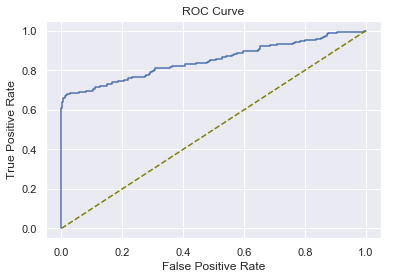

Iteration 0 | loss: 0.124955
Iteration 1 | loss: 0.124969
Iteration 2 | loss: 0.124964
Iteration 3 | loss: 0.124863
Iteration 4 | loss: 0.124970
Logistic Regression Classifier
confusion matrix =  [[1853   36]
 [  78  156]]
tp =  156 fp =  36 fn =  78 tn =  1853
accuracy score  =  0.9463024022609515
precision =  0.8125
recall =  0.6666666666666666
F1-score =  0.7323943661971831
auc =  0.8298561623071947
Cost for less false negative =  7680
Cost for less false positive =  3522


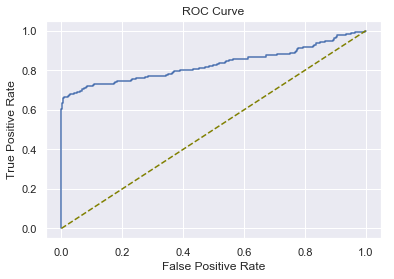

Iteration 0 | loss: 0.124948
Iteration 1 | loss: 0.124969
Iteration 2 | loss: 0.124979
Iteration 3 | loss: 0.124975
Iteration 4 | loss: 0.124976
Logistic Regression Classifier
confusion matrix =  [[1754  158]
 [  57  154]]
tp =  154 fp =  158 fn =  57 tn =  1754
accuracy score  =  0.898728214790391
precision =  0.4935897435897436
recall =  0.7298578199052133
F1-score =  0.5889101338432122
auc =  0.8600606793709968
Cost for less false negative =  5704
Cost for less false positive =  15703


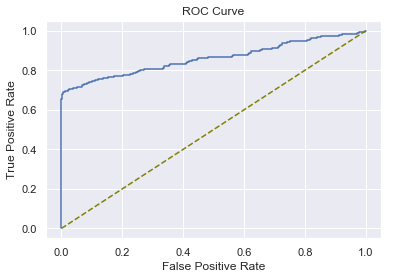

Iteration 0 | loss: 0.124927
Iteration 1 | loss: 0.124933
Iteration 2 | loss: 0.124973
Iteration 3 | loss: 0.124971
Iteration 4 | loss: 0.124921
Logistic Regression Classifier
confusion matrix =  [[1917    0]
 [ 126   80]]
tp =  80 fp =  0 fn =  126 tn =  1917
accuracy score  =  0.940650023551578
precision =  1.0
recall =  0.3883495145631068
F1-score =  0.5594405594405594
auc =  0.8562200242085378
Cost for less false negative =  12520
Cost for less false positive =  46


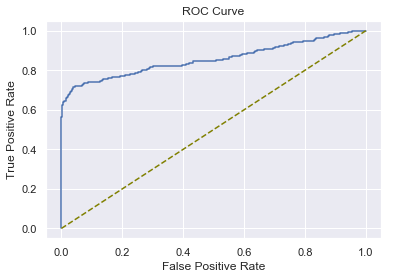

Iteration 0 | loss: 0.124973
Iteration 1 | loss: 0.124977
Iteration 2 | loss: 0.124985
Iteration 3 | loss: 0.124969
Iteration 4 | loss: 0.124963
Logistic Regression Classifier
confusion matrix =  [[1909    1]
 [  79  134]]
tp =  134 fp =  1 fn =  79 tn =  1909
accuracy score  =  0.9623174752708431
precision =  0.9925925925925926
recall =  0.6291079812206573
F1-score =  0.7701149425287356
auc =  0.8424722857213086
Cost for less false negative =  7767
Cost for less false positive =  45


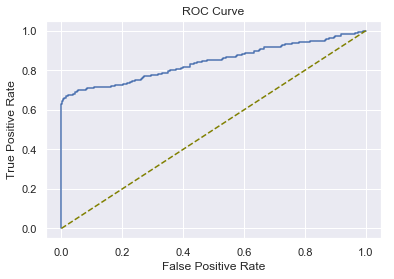

In [25]:
# Doing 10 fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)

# for data set A
kf.get_n_splits(X_train)

# for data set B
kf.get_n_splits(X_train_B)

# function for a cross validation
def doCrossValidation(X_train,Y_train):
    for train_index, test_index in kf.split(X_train):
        X_train1, X_test1 = X_train[train_index], X_train[test_index]
        y_train1, y_test1 = Y_train[train_index], Y_train[test_index]
        ones = np.ones([X_train1.shape[0],1])
        X_train1 = np.concatenate((ones,X_train1),axis=1)
        weight = np.zeros([1,X_train1.shape[1]])
        W,loss = gradientDescent(X_train1,y_train1,weight,iters,alpha)
        ones = np.ones([X_test1.shape[0],1])
        X_test1 = np.concatenate((ones,X_test1),axis=1)
        learned_Y,y_score = getPrediction(X_test1,W)
        getResult(y_test1,learned_Y,y_score)

# for cross validation with data set A
doCrossValidation(X_train,Y_train)

# for cross validation with data set B
doCrossValidation(X_train_B,Y_train_B)
    

Task 1.2 training the classifier on the tarining set and then running it on the tarining set

Iteration 0 | loss: 0.124955
Iteration 1 | loss: 0.124962
Iteration 2 | loss: 0.124894
Iteration 3 | loss: 0.124933
Iteration 4 | loss: 0.124991
Weigths for the linear model [[ 1.37297039e-04  4.28122478e-06 -2.48899547e-04 -5.50124539e-05
   5.34900060e-06  2.34300382e-04 -7.54046897e-06 -5.96943649e-06
  -1.00182717e-04 -1.76182853e-19 -4.10965041e-05 -8.23249393e-05
  -2.50891904e-04  1.92060130e-05  5.37249284e-05 -4.77554919e-05
  -2.38777459e-05  4.77554919e-05  1.61174785e-04]]
Logistic Regression Classifier
confusion matrix =  [[11195  3878]
 [  581  1098]]
tp =  1098 fp =  3878 fn =  581 tn =  11195
accuracy score  =  0.7338228271251194
precision =  0.22065916398713825
recall =  0.653960690887433
F1-score =  0.32997746055597293
auc =  0.7625025155519691
Cost for less false negative =  60880
Cost for less false positive =  387283


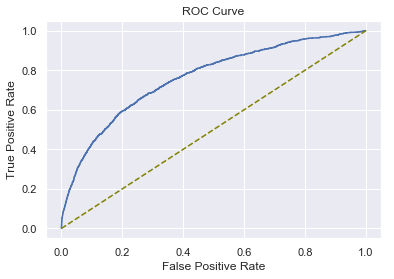

In [20]:
# Running the classifier for training set A
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)
weight = np.zeros([1,X_train.shape[1]])
W,loss = gradientDescent(X_train,Y_train,weight,iters,alpha)
print("Weigths for the linear model", W)
learned_Y_train,y_score_train = getPrediction(X_train,W)
getResult(Y_train,learned_Y_train,y_score_train)

Task 1.3 Running the classifier on test case

Logistic Regression Classifier
confusion matrix =  [[2803  970]
 [ 148  267]]
tp =  267 fp =  970 fn =  148 tn =  2803
accuracy score  =  0.733046800382044
precision =  0.2158447857720291
recall =  0.6433734939759036
F1-score =  0.3232445520581114
auc =  0.7605076015698096
Cost for less false negative =  15503
Cost for less false positive =  96881


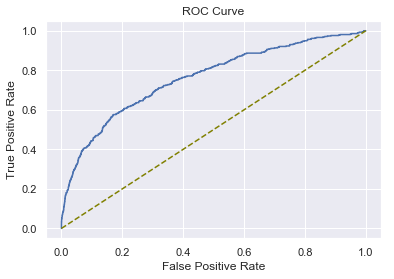

In [21]:
# Running the classifier for test set A
ones = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones,X_test),axis=1)
learned_Y,y_score = getPrediction(X_test,W)
getResult(Y_test,learned_Y,y_score)

Task 1.4 The classifier is neither overfitting nor underfitting as it is giving similar results in both the training as well as the test cases.

Iteration 0 | loss: 0.124980
Iteration 1 | loss: 0.124969
Iteration 2 | loss: 0.124877
Iteration 3 | loss: 0.124974
Iteration 4 | loss: 0.124990
Weigths for the linear model [[-2.59042954e-04 -4.97620159e-06  2.66210150e-06  6.52136108e-06
  -1.44995754e-05  1.20694717e-03  3.53240392e-06 -5.74667374e-06
   2.82592313e-05 -8.60063563e-06  2.35493595e-05 -4.97620159e-06
   1.80433178e-05  2.57657698e-05 -1.41296157e-05 -1.88394876e-05
   1.88394876e-05  3.76789751e-05 -1.88394876e-05]]
Logistic Regression Classifier
confusion matrix =  [[12696  6394]
 [  434  1708]]
tp =  1708 fp =  6394 fn =  434 tn =  12696
accuracy score  =  0.6784099472494348
precision =  0.21081214514934585
recall =  0.7973856209150327
F1-score =  0.3334634908238969
auc =  0.8466635999606758
Cost for less false negative =  48086
Cost for less false positive =  638126


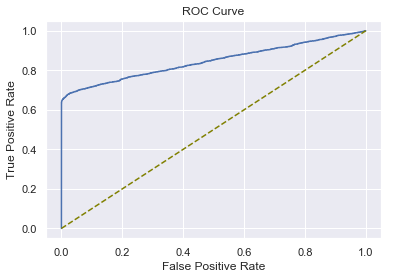

In [22]:
# Running the classifier for training set B
ones = np.ones([X_train_B.shape[0],1])
X_train_B = np.concatenate((ones,X_train_B),axis=1)
weight = np.zeros([1,X_train_B.shape[1]])
W,loss = gradientDescent(X_train_B,Y_train_B,weight,iters,alpha)
print("Weigths for the linear model", W)
learned_Y_train,y_score_train = getPrediction(X_train_B,W)
getResult(Y_train_B,learned_Y_train,y_score_train)

Logistic Regression Classifier
confusion matrix =  [[3231 1565]
 [  92  420]]
tp =  420 fp =  1565 fn =  92 tn =  3231
accuracy score  =  0.6878296910324039
precision =  0.21158690176322417
recall =  0.8203125
F1-score =  0.3364036844213055
auc =  0.8573159924937448
Cost for less false negative =  10345
Cost for less false positive =  156172


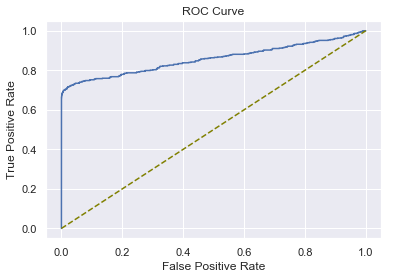

In [23]:
# Running the classifier for test set B
ones = np.ones([X_test_B.shape[0],1])
X_test_B = np.concatenate((ones,X_test_B),axis=1)
learned_Y,y_score = getPrediction(X_test_B,W)
getResult(Y_test_B,learned_Y,y_score)

Task 4.1 : The classifier that catches max number of fraudulent data should have the lowest cost. So the cost matrix to find such a classifier would have a high cost for each false negative value. So if this cost is low that means that this classifier has less false negative that means it has recognised them as true positives which is the number of fraudulent samples. 
Based on that the cost1 and accuracy for test data of set A

Logistic Regression => cost = 15503 accuracy = 0.73

Naive Bayes => cost = 41095 accuracy = 0.90

KNN => cost = 41512 accuracy = 0.89

Thus the best choice will be Logistic regression in this case.

Task 4.1 : The classifier that does not raise many false alarms is a classifier that has small number of false positives. So in the new cost matrix we have a higher cost for each false positive that the classifier has. Thus the classifier that has the lowest cost as per the new cost matrix is the better choice. 
Based on that the cost2 and accuracy for test data of set A

Logistic Regression => cost = 96881 accuracy = 0.73

Naive Bayes => cost = 1099 accuracy = 0.90

KNN => cost = 3100 accuracy = 0.89

Thus the best choice will be NaiveBayes in this case.

Task 4.3 : As we can see from the above results we can see that Naive Bayes would be the most balanced choice of classifier. Since for task 4.1 NB is the second best classifier and for the task 4.2 its the best classifier that makes NB the most appropriate choice for a balanced classifier for the bank. Also even though it is a little computationaly expensive it does have a really good accuracy score.